In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:

# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''SELECT f.film_id, r.inventory_id, r.rental_id, r.rental_date,  f.title, f.language_id, f.rental_duration, f.rental_rate, f.length, f.replacement_cost, f.rating, f.special_features, c.name
FROM rental r
INNER JOIN inventory i USING (inventory_id)
INNER JOIN film f USING (film_id)
INNER JOIN film_category fc USING (film_id)
INNER JOIN category c USING (category_id)
WHERE CONVERT(rental_date,DATE) BETWEEN '2005-05-01' AND '2005-05-31';'''

data = pd.read_sql_query(query, engine)
data.head()


,film_id,inventory_id,rental_id,rental_date,title,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,name
0,19,95,588,2005-05-28 12:08:37,AMADEUS HOLY,1,6,0.99,113,20.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action
1,21,102,207,2005-05-26 08:04:38,AMERICAN CIRCUS,1,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",Action
2,21,103,135,2005-05-25 21:58:58,AMERICAN CIRCUS,1,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",Action
3,29,142,1123,2005-05-31 16:48:43,ANTITRUST TOMATOES,1,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",Action
4,29,143,1134,2005-05-31 19:14:15,ANTITRUST TOMATOES,1,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",Action


In [3]:
data.shape

(1156, 13)

In [4]:

data.isna().sum()

film_id             0
inventory_id        0
rental_id           0
rental_date         0
title               0
language_id         0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
special_features    0
name                0
dtype: int64

In [5]:
data1 = pd.read_sql('SELECT language_id, name FROM language', engine)
data1.head(60)


,language_id,name
0,1,English
1,2,Italian
2,3,Japanese
3,4,Mandarin
4,5,French
5,6,German


In [6]:
data = pd.DataFrame.merge(data,data1,on='language_id')
data.head(60)


,film_id,inventory_id,rental_id,rental_date,title,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,name_x,name_y
0,19,95,588,2005-05-28 12:08:37,AMADEUS HOLY,1,6,0.99,113,20.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action,English
1,21,102,207,2005-05-26 08:04:38,AMERICAN CIRCUS,1,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",Action,English
2,21,103,135,2005-05-25 21:58:58,AMERICAN CIRCUS,1,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",Action,English
3,29,142,1123,2005-05-31 16:48:43,ANTITRUST TOMATOES,1,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",Action,English
4,29,143,1134,2005-05-31 19:14:15,ANTITRUST TOMATOES,1,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",Action,English
5,56,249,300,2005-05-26 20:57:00,BAREFOOT MANCHURIAN,1,6,2.99,129,15.99,G,"Trailers,Commentaries",Action,English
6,67,299,835,2005-05-29 23:37:00,BERETS AGENT,1,5,2.99,77,24.99,PG-13,Deleted Scenes,Action,English
7,97,441,800,2005-05-29 17:28:12,BRIDE INTRIGUE,1,7,0.99,56,24.99,G,"Trailers,Commentaries,Behind the Scenes",Action,English
8,111,497,1057,2005-05-31 07:58:06,CADDYSHACK JEDI,1,3,0.99,52,17.99,NC-17,"Commentaries,Deleted Scenes",Action,English
9,111,500,700,2005-05-29 02:18:54,CADDYSHACK JEDI,1,3,0.99,52,17.99,NC-17,"Commentaries,Deleted Scenes",Action,English


In [7]:

pd.set_option('display.max_columns', None)
display(data.dtypes)


film_id                      int64
inventory_id                 int64
rental_id                    int64
rental_date         datetime64[ns]
title                       object
language_id                  int64
rental_duration              int64
rental_rate                float64
length                       int64
replacement_cost           float64
rating                      object
special_features            object
name_x                      object
name_y                      object
dtype: object

In [8]:

data=data.drop(columns=['film_id', 'inventory_id', 'rental_id', 'language_id', 'rental_date'])

In [9]:

data.head()

,title,rental_duration,rental_rate,length,replacement_cost,rating,special_features,name_x,name_y
0,AMADEUS HOLY,6,0.99,113,20.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action,English
1,AMERICAN CIRCUS,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",Action,English
2,AMERICAN CIRCUS,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",Action,English
3,ANTITRUST TOMATOES,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",Action,English
4,ANTITRUST TOMATOES,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",Action,English


In [10]:
data.columns = ['title', 'rental_duration', 'rental_rate', 'length','replacement_cost', 'rating', 'special_features','category', 'language']


In [11]:
data['rental_duration'].unique()

array([6, 3, 5, 7, 4])

In [12]:
data['rental_duration'] = data['rental_duration'].astype('object') 

In [13]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
rental_rate,1156.0,2.931176,1.667619,0.99,0.99,2.99,4.99,4.99
length,1156.0,114.993080,40.167290,46.00,82.00,113.00,149.00,185.00
replacement_cost,1156.0,20.312664,6.157152,9.99,14.99,20.99,25.99,29.99


In [16]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [18]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query2 = '''SELECT f.film_id, r.inventory_id, r.rental_id, r.rental_date,  f.title, f.language_id, f.rental_duration, f.rental_rate, f.length, f.replacement_cost, f.rating, f.special_features, c.name,
CASE 
WHEN DATE(rental_date)
BETWEEN '2005-05-01' AND '2005-05-31'
THEN True
ELSE False
END AS day_type
FROM rental r
INNER JOIN inventory i USING (inventory_id)
INNER JOIN film f USING (film_id)
INNER JOIN film_category fc USING (film_id)
INNER JOIN category c USING (category_id)
GROUP BY f.title;'''

data_all = pd.read_sql_query(query, engine)
data_all.shape
data_all.head()




,film_id,inventory_id,rental_id,rental_date,title,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,name
0,19,95,588,2005-05-28 12:08:37,AMADEUS HOLY,1,6,0.99,113,20.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action
1,21,102,207,2005-05-26 08:04:38,AMERICAN CIRCUS,1,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",Action
2,21,103,135,2005-05-25 21:58:58,AMERICAN CIRCUS,1,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",Action
3,29,142,1123,2005-05-31 16:48:43,ANTITRUST TOMATOES,1,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",Action
4,29,143,1134,2005-05-31 19:14:15,ANTITRUST TOMATOES,1,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",Action


In [19]:

data_all = pd.DataFrame.merge(data_all,data1,on='language_id')
data_all.head(60)


,film_id,inventory_id,rental_id,rental_date,title,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,name_x,name_y
0,19,95,588,2005-05-28 12:08:37,AMADEUS HOLY,1,6,0.99,113,20.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action,English
1,21,102,207,2005-05-26 08:04:38,AMERICAN CIRCUS,1,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",Action,English
2,21,103,135,2005-05-25 21:58:58,AMERICAN CIRCUS,1,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",Action,English
3,29,142,1123,2005-05-31 16:48:43,ANTITRUST TOMATOES,1,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",Action,English
4,29,143,1134,2005-05-31 19:14:15,ANTITRUST TOMATOES,1,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",Action,English
5,56,249,300,2005-05-26 20:57:00,BAREFOOT MANCHURIAN,1,6,2.99,129,15.99,G,"Trailers,Commentaries",Action,English
6,67,299,835,2005-05-29 23:37:00,BERETS AGENT,1,5,2.99,77,24.99,PG-13,Deleted Scenes,Action,English
7,97,441,800,2005-05-29 17:28:12,BRIDE INTRIGUE,1,7,0.99,56,24.99,G,"Trailers,Commentaries,Behind the Scenes",Action,English
8,111,497,1057,2005-05-31 07:58:06,CADDYSHACK JEDI,1,3,0.99,52,17.99,NC-17,"Commentaries,Deleted Scenes",Action,English
9,111,500,700,2005-05-29 02:18:54,CADDYSHACK JEDI,1,3,0.99,52,17.99,NC-17,"Commentaries,Deleted Scenes",Action,English


In [20]:
data_all=data_all.drop(columns=['film_id', 'inventory_id', 'rental_id', 'language_id', 'rental_date'])
data_all.head()


,title,rental_duration,rental_rate,length,replacement_cost,rating,special_features,name_x,name_y
0,AMADEUS HOLY,6,0.99,113,20.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action,English
1,AMERICAN CIRCUS,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",Action,English
2,AMERICAN CIRCUS,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",Action,English
3,ANTITRUST TOMATOES,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",Action,English
4,ANTITRUST TOMATOES,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",Action,English


In [21]:
data_all['rental_duration'] = data_all['rental_duration'].astype('object') # This will be treated as categorical
# data_all['target_col'] = data_all['target_col'].astype('object')
data_all.shape
data_all.head()


,title,rental_duration,rental_rate,length,replacement_cost,rating,special_features,name_x,name_y
0,AMADEUS HOLY,6,0.99,113,20.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action,English
1,AMERICAN CIRCUS,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",Action,English
2,AMERICAN CIRCUS,3,4.99,129,17.99,R,"Commentaries,Behind the Scenes",Action,English
3,ANTITRUST TOMATOES,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",Action,English
4,ANTITRUST TOMATOES,5,2.99,168,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",Action,English


In [27]:

data_all.columns = ['title', 'rental_duration', 'rental_rate', 'length','replacement_cost', 'rating', 'special_features','name_x', 'name_y']



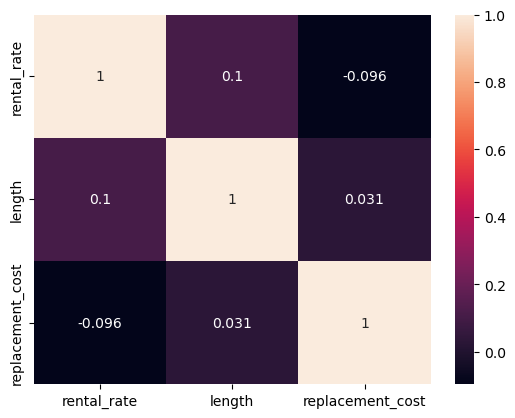

In [28]:

import matplotlib.pyplot as plt
import seaborn as sns 
correlations_matrix = data_all.corr()   
correlations_matrix




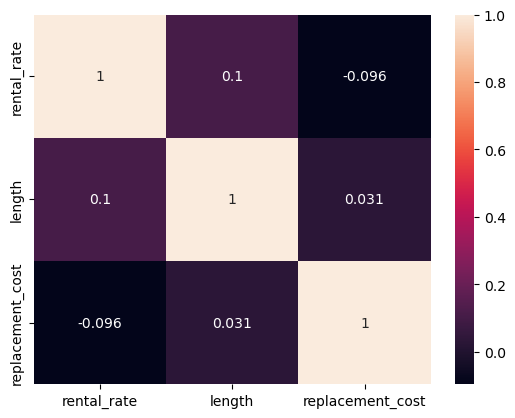

In [29]:

sns.heatmap(correlations_matrix, annot=True)
plt.show()

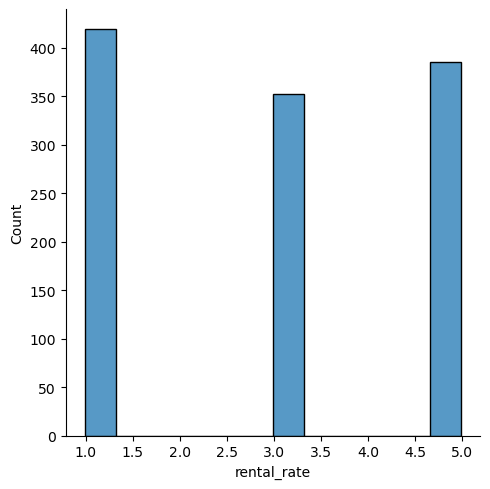

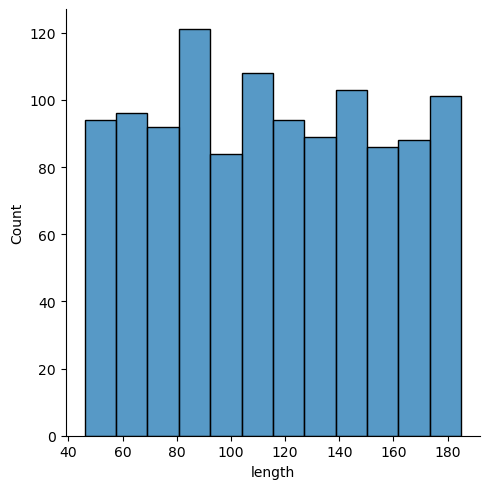

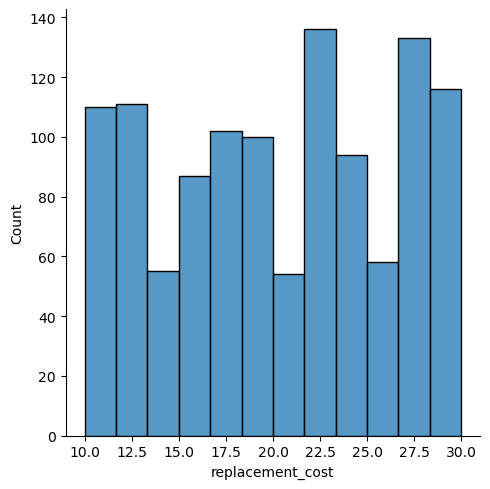

In [30]:

sns.displot(data_all['rental_rate'])
plt.show()

sns.displot(data_all['length'])
plt.show()

sns.displot(data_all['replacement_cost'])
plt.show()


In [32]:

y = data_all['target_col']
X = data_all.drop(['target_col','title'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

KeyError: 'target_col'

In [33]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

NameError: name 'X_train' is not defined